# Calculate the correlation within a equity portfolio

In [4]:
import numpy as np
import pandas as pd

#used to grab the stock prices, with yahoo
import pandas_datareader as web
from datetime import datetime

#to visualize the results
import matplotlib.pyplot as plt
import seaborn


 - Select start date for correlation window  
 - Import a list of tickers

In [10]:
start = datetime(2017, 1, 1)
symbols_list = ['NVDA', 'AMZN', 'AAPL', 'AMD', 'BA', 'DHI', 'COST', 'MSFT', 'FB']

Define an array (symbols) to store prices

In [11]:
symbols=[]

#pull price using iex for each symbol in list defined above
for ticker in symbols_list: 
    r = web.DataReader(ticker, 'yahoo', start)
    # add a symbol column
    r['Symbol'] = ticker 
    symbols.append(r)


#concatenate into df
df = pd.concat(symbols)
df = df.reset_index()
df = df[['Date', 'Close', 'Symbol']]
df.head()

,Date,Close,Symbol
0,2017-01-03,102.010002,NVDA
1,2017-01-04,104.389999,NVDA
2,2017-01-05,101.739998,NVDA
3,2017-01-06,103.099998,NVDA
4,2017-01-09,107.279999,NVDA


In [13]:
df_pivot = df.pivot('Date','Symbol','Close').reset_index()
df_pivot.head()

Symbol,Date,AAPL,AMD,AMZN,BA,COST,DHI,FB,MSFT,NVDA
0,2017-01-03,29.037500,11.43,753.669983,156.970001,159.729996,27.559999,116.860001,62.580002,102.010002
1,2017-01-04,29.004999,11.43,757.179993,158.619995,159.759995,28.230000,118.690002,62.299999,104.389999
2,2017-01-05,29.152500,11.24,780.450012,158.710007,162.910004,28.350000,120.669998,62.299999,101.739998
3,2017-01-06,29.477501,11.32,795.989990,159.100006,162.830002,27.850000,123.410004,62.840000,103.099998
4,2017-01-09,29.747499,11.49,796.919983,158.320007,160.970001,27.959999,124.900002,62.639999,107.279999


In [14]:
corr_df = df_pivot.corr(method='pearson')

#reset symbol as index 
corr_df.head().reset_index()
del corr_df.index.name
corr_df.head(10)

Symbol,AAPL,AMD,AMZN,BA,COST,DHI,FB,MSFT,NVDA
AAPL,1.000000,0.962890,0.918989,-0.291659,0.878483,0.876877,0.888447,0.937539,0.911735
AMD,0.962890,1.000000,0.906325,-0.313752,0.918608,0.802460,0.814798,0.953358,0.816557
AMZN,0.918989,0.906325,1.000000,-0.082147,0.891459,0.800485,0.839341,0.945788,0.868292
BA,-0.291659,-0.313752,-0.082147,1.000000,-0.057960,-0.038861,-0.132903,-0.140054,-0.283447
COST,0.878483,0.918608,0.891459,-0.057960,1.000000,0.776591,0.753190,0.966278,0.688569
DHI,0.876877,0.802460,0.800485,-0.038861,0.776591,1.000000,0.909705,0.823745,0.830597
FB,0.888447,0.814798,0.839341,-0.132903,0.753190,0.909705,1.000000,0.837826,0.866297
MSFT,0.937539,0.953358,0.945788,-0.140054,0.966278,0.823745,0.837826,1.000000,0.793901
NVDA,0.911735,0.816557,0.868292,-0.283447,0.688569,0.830597,0.866297,0.793901,1.000000


Take the bottom triangle since it repeats itself

In [16]:
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True

# Generate correlation heat map

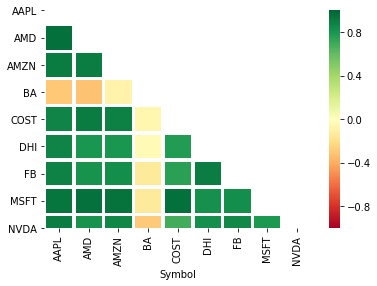

In [17]:
seaborn.heatmap(corr_df, cmap='RdYlGn', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2.5)
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
plt.show()